# Advanced Usage
In this tutorial we will continue from the job created in the Basic Tutorial,
and demonstrate some more advanced functionality that DFControl offers.

To load a previously saved job we here provide a valid job directory with a job.tt script
in it.

In [1]:
using DFControl

tjob = DFJob(joinpath(pathof(DFControl), "..","..","docs", "src", "assets", "job"))#hide
tjob2 = DFJob(joinpath(pathof(DFControl), "..","..", "docs", "src", "assets", "Job2"))#hide
try#hide
global job = DFJob("job")
catch#hide
global job = deepcopy(tjob)#hide
set_localdir!(job, "job"); #hide
job#hide
end#hide

+-------------------------------------DFJOB-----------------------------------+
| name:       Si                                                              |
| local_dir:  /home/travis/build/louisponet/DFControl.jl/docs/src/assets/job  |
| server:     localhost                                                       |
+-----------------------------------------------------------------------------+
(scheduled, not scheduled)
		scf  
		bands


Since the job created in the Basic Tutorial was saved in the "job" directory this will work, see the section on Jobs for
further details and options on how to load previously saved jobs.

The next thing we may want to do is to change the directory where the job is running.

In [2]:
try#hide
set_localdir!(job, "Job2", copy=true)
catch#hide
global job = deepcopy(tjob2);#hide
pop!(job);#hide
pop!(job);#hide
job#hide
end#hide

┌ Info: /home/travis/build/louisponet/DFControl.jl/docs/src/guide/Job2 did not exist, it was created.
└ @ DFControl /home/travis/build/louisponet/DFControl.jl/src/jobAPI.jl:160


+-------------------------------------DFJOB-----------------------------------+
| name:       Si                                                              |
| local_dir:  /home/travis/build/louisponet/DFControl.jl/docs/src/guide/Job2  |
| server:     localhost                                                       |
+-----------------------------------------------------------------------------+
(scheduled, not scheduled)
		scf  
		bands


With the `copy=true` flag we let DFControl know that not only to create and set the
new directory, but also to copy the previous results and temporary files to the
new directory so we don't have to rerun the scf calculation.

Next we would like to plot the projected density of states.
For that we create both an nscf calculation to get a uniform k-grid, and projwfc input.

In [3]:
push!(job, gencalc_nscf(job["scf"], (6,6,6)))

┌ Info: 
│ input.name = nscf
│ input.infile = nscf.in
│ input.outfile = nscf.out
└ @ DFControl /home/travis/build/louisponet/DFControl.jl/src/inputAPI.jl:221


3-element Vector{DFInput}:
 DFInput{QE}:
name  = scf
dir   = /home/travis/build/louisponet/DFControl.jl/docs/src/guide/Job2
execs = mpirun, pw.x
run   = false
data  = [:k_points]
flags:
	prefix      => Si
	ecutwfc     => 20.0
	calculation => scf
	conv_thr    => 1.0e-6
	outdir      => /home/ponet/.julia/dev/DFControl/docs/src/assets/job/outputs

 DFInput{QE}:
name  = bands
dir   = /home/travis/build/louisponet/DFControl.jl/docs/src/guide/Job2
execs = mpirun, pw.x
run   = true
data  = [:k_points]
flags:
	prefix      => Si
	verbosity   => high
	ecutwfc     => 20.0
	calculation => bands
	conv_thr    => 1.0e-6
	outdir      => /home/ponet/.julia/dev/DFControl/docs/src/assets/job/outputs

 DFInput{QE}:
name  = nscf
dir   = /home/travis/build/louisponet/DFControl.jl/docs/src/guide/Job2
execs = mpirun, pw.x
run   = true
data  = [:k_points]
flags:
	prefix      => Si
	verbosity   => high
	ecutwfc     => 20.0
	calculation => nscf
	conv_thr    => 1.0e-6
	outdir      => /home/ponet/.julia/dev/DFCont

The second argument of gencalc_nscf is the kgrid. When passing a 3-Tuple,
the code will assume that an explicit k-grid is requested, which can be verified by

In [4]:
data(job["nscf"], :k_points)

Block name: k_points
Block option: crystal
Block data:

[[0.0, 0.0, 0.0, 0.004629629629629629], [0.16666666666666666, 0.0, 0.0, 0.004629629629629629], [0.3333333333333333, 0.0, 0.0, 0.004629629629629629], [0.5, 0.0, 0.0, 0.004629629629629629], [0.6666666666666666, 0.0, 0.0, 0.004629629629629629], [0.8333333333333334, 0.0, 0.0, 0.004629629629629629], [0.0, 0.16666666666666666, 0.0, 0.004629629629629629], [0.16666666666666666, 0.16666666666666666, 0.0, 0.004629629629629629], [0.3333333333333333, 0.16666666666666666, 0.0, 0.004629629629629629], [0.5, 0.16666666666666666, 0.0, 0.004629629629629629], [0.6666666666666666, 0.16666666666666666, 0.0, 0.004629629629629629], [0.8333333333333334, 0.16666666666666666, 0.0, 0.004629629629629629], [0.0, 0.3333333333333333, 0.0, 0.004629629629629629], [0.16666666666666666, 0.3333333333333333, 0.0, 0.004629629629629629], [0.3333333333333333, 0.3333333333333333, 0.0, 0.004629629629629629], [0.5, 0.3333333333333333, 0.0, 0.004629629629629629], [0.6666666

Next we generate a projwfc input using the fermi level as a guide for the
energy window.
The arguments are structured as (template, Emin, Emax, deltaE) respectively.

In [5]:
fermi = readfermi(job)
push!(job, gencalc_projwfc(job["nscf"], fermi-10, fermi+1, 0.1))

┌ Info: 
│ input.name = projwfc
│ input.infile = projwfc.in
│ input.outfile = projwfc.out
└ @ DFControl /home/travis/build/louisponet/DFControl.jl/src/inputAPI.jl:221


4-element Vector{DFInput}:
 DFInput{QE}:
name  = scf
dir   = /home/travis/build/louisponet/DFControl.jl/docs/src/guide/Job2
execs = mpirun, pw.x
run   = false
data  = [:k_points]
flags:
	prefix      => Si
	ecutwfc     => 20.0
	calculation => scf
	conv_thr    => 1.0e-6
	outdir      => /home/ponet/.julia/dev/DFControl/docs/src/assets/job/outputs

 DFInput{QE}:
name  = bands
dir   = /home/travis/build/louisponet/DFControl.jl/docs/src/guide/Job2
execs = mpirun, pw.x
run   = true
data  = [:k_points]
flags:
	prefix      => Si
	verbosity   => high
	ecutwfc     => 20.0
	calculation => bands
	conv_thr    => 1.0e-6
	outdir      => /home/ponet/.julia/dev/DFControl/docs/src/assets/job/outputs

 DFInput{QE}:
name  = nscf
dir   = /home/travis/build/louisponet/DFControl.jl/docs/src/guide/Job2
execs = mpirun, pw.x
run   = true
data  = [:k_points]
flags:
	prefix      => Si
	verbosity   => high
	ecutwfc     => 20.0
	calculation => nscf
	conv_thr    => 1.0e-6
	outdir      => /home/ponet/.julia/dev/DFCont

Next we disable the bands calculation, run the new ones, and plot the results

┌ Info: Found 2 atomic orbitals that satisfy the minimum occupation:
│ [(:Si, "s"), (:Si, "p")]
└ @ DFControl /home/travis/build/louisponet/DFControl.jl/src/plotting.jl:169
┌ Info: Reading pdos files and generating band coloring...
└ @ DFControl /home/travis/build/louisponet/DFControl.jl/src/plotting.jl:176
┌ Info: Plotting bands...
└ @ DFControl /home/travis/build/louisponet/DFControl.jl/src/plotting.jl:224


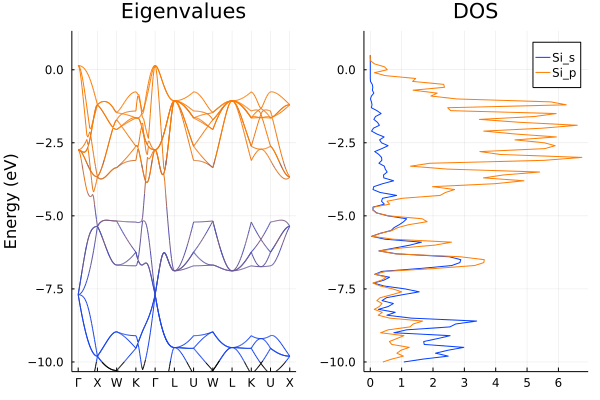

In [6]:
job["bands"].run = false
try#hide
submit(job)
catch#hide
global job = deepcopy(tjob2)#hide
end#hide
using Plots
plot(job, -10, 1)

As we can see, again DFControl identifies the additional information that is now present in the job, and uses it
to display in the plot.

In the demonstrated case we see that everything went according to plan, however, often things need to be changed
in a trial and error way until the desired results are found.

On common occurence is that input flags have to be set, or changed. This can be done in two ways

In [7]:
job[:ecutwfc] = 40.0

┌ Info: scf:
│   -> ecutwfc:
│       20.0 set to: 40.0
└ @ DFControl /home/travis/build/louisponet/DFControl.jl/src/inputAPI.jl:38
┌ Info: bands:
│   -> ecutwfc:
│       20.0 set to: 40.0
└ @ DFControl /home/travis/build/louisponet/DFControl.jl/src/inputAPI.jl:38
┌ Info: nscf:
│   -> ecutwfc:
│       20.0 set to: 40.0
└ @ DFControl /home/travis/build/louisponet/DFControl.jl/src/inputAPI.jl:38
┌ Warning: Flag ecutwfc was ignored since it could not be found in the allowed flags for input projwfc.
└ @ DFControl /home/travis/build/louisponet/DFControl.jl/src/inputAPI.jl:40


40.0

will go through all the inputs of the job and set the flag if it is allowed, i.e. the flag will not
be set in the projwfc input since it makes no sense.

In [8]:
job["bands"][:nbnd] = 30

┌ Info: bands:
│   -> nbnd:
│        set to: 30
└ @ DFControl /home/travis/build/louisponet/DFControl.jl/src/inputAPI.jl:38


30

This will set a flag for one specific calculation, again checking whether the flag is valid, and the type
will be converted to the correct one.

In order to quickly specify what calculations to schedule and which not, one can use

In [9]:
set_flow!(job, "" => false, "scf" => true)

+-------------------------------------DFJOB-----------------------------------+
| name:       Si                                                              |
| local_dir:  /home/travis/build/louisponet/DFControl.jl/docs/src/assets/Job2 |
| server:     localhost                                                       |
+-----------------------------------------------------------------------------+
(scheduled, not scheduled)
		scf    
		bands  
		nscf   
		projwfc


As we can see, only the scf and nscf calculations are scheduled to run now,
this is because for each of the pairs in the arguments of `set_flow!`, every input inside
the job for which the string occurs in the name will be set to run or not depending on the Bool.